<a href="https://colab.research.google.com/github/Gulzamanshaikh/Datavisualization_PGD/blob/main/Image_Classification_using_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
import zipfile
from google.colab import files
import matplotlib.pyplot as plt


In [5]:
# Install Git if not already installed (usually pre-installed in Colab)
!git --version

# Clone the repository
!git clone https://github.com/miladfa7/Image-Classification-Transfer-Learning.git


git version 2.34.1
Cloning into 'Image-Classification-Transfer-Learning'...
remote: Enumerating objects: 2102, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 2102 (delta 7), reused 6 (delta 1), pack-reused 2084 (from 1)
Receiving objects: 100% (2102/2102), 90.89 MiB | 25.39 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [6]:
dataset = ('/content/Image-Classification-Transfer-Learning/Dataset')
train_dir = os.path.join(dataset, 'training')
test_dir = os.path.join(dataset, 'test')

In [7]:
# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1554 images belonging to 20 classes.


In [9]:
# ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.endswith(('.jpg', '.png'))]


In [10]:
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array

In [11]:
test_images = [preprocess_image(path) for path in test_image_paths]
test_images = tf.concat(test_images, axis=0)


In [12]:
# Build the model
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [13]:
# Print model summary
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 60,450,324 (230.60 MB)

 Trainable params: 60,306,580 (230.05 MB)

 Non-trainable params: 143,744 (561.50 KB)

In [14]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=train_generator  # Use a portion of training data as validation data
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.5531 - loss: 1.7563 - val_accuracy: 0.9273 - val_loss: 0.2835
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9417 - loss: 0.2270 - val_accuracy: 0.9318 - val_loss: 0.2344
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9568 - loss: 0.1397 - val_accuracy: 0.9466 - val_loss: 0.1818
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9612 - loss: 0.1557 - val_accuracy: 0.9466 - val_loss: 0.1923
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9698 - loss: 0.1110 - val_accuracy: 0.9691 - val_loss: 0.0912
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9553 - loss: 0.1205 - val_accuracy: 0.9762 - val_loss: 0.1045
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9688 - loss: 0.1003 - val_accuracy: 0.9762 - val_loss: 0.0771
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9591 - loss: 0.1209 - val_accuracy: 0.9762 - val_loss: 0.0808
Ep

In [15]:
# Evaluate the model on training data (as test data isn't labeled)
loss, accuracy = model.evaluate(train_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 528ms/step - accuracy: 0.9423 - loss: 0.2814
Test Loss: 0.27105772495269775
Test Accuracy: 0.9485199451446533


In [16]:
# Predict on test images
predictions = model.predict(test_images)

16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 966ms/step


In [18]:
# Decode predictions
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[i] for i in predicted_classes]


In [19]:
# Print predictions
for image_path, label in zip(test_image_paths, predicted_labels):
    print(f"Image: {image_path}, Predicted label: {label}")

Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_1285.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_1771.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_1494.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_501.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_1747.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_1342.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_873.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_1377.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Learning/Dataset/test/IMG_775.jpg, Predicted label: laptop
Image: /content/Image-Classification-Transfer-Lea

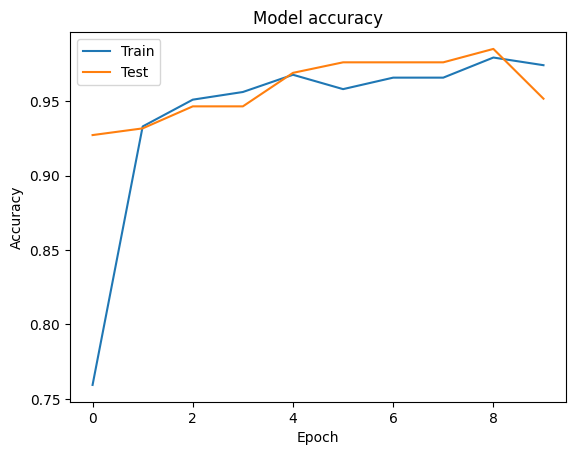

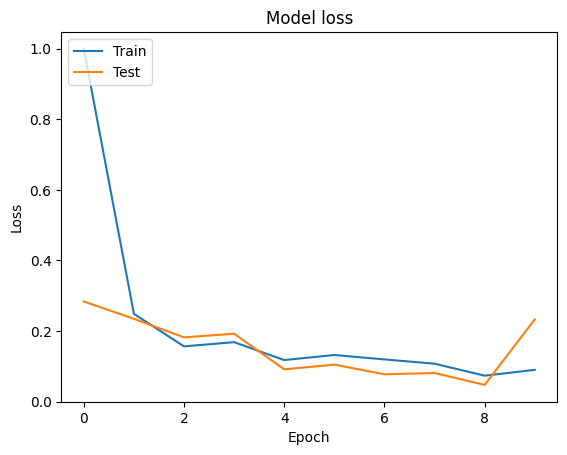

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()